#  **Projet Machine Learning Cyber Attack**


## Import libraries


In [3]:
import pandas as pd
import numpy as np
from uaparser import UAParser as parse_ua #import uaparser library to parse device information column
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'uaparser'

## Import Data

Import the cybersecurity database from csv to dataframe

In [1541]:
dataset_path = "cybersecurity_attacks.csv"
df = pd.read_csv(dataset_path)


Import database with the list of Os and Browser End of Care \
This database will be used to link with os and browser extracted from the user agent column (device information)\
and add the end of care date for each version of OS and Browser

In [1550]:
'''
MacOs = {
    'Version Number': [
        'Rhapsody Developer Release', 'Mac OS X Server 1.0', 'Mac OS X Developer Preview',
        'Mac OS X Public Beta', 'Mac OS X v10.0', 'Mac OS X v10.1', 'Mac OS X v10.2',
        'Mac OS X v10.3', 'Mac OS X v10.4', 'Mac OS X v10.4 (Universal)', 'Mac OS X v10.5',
        'Mac OS X v10.6', 'Mac OS X v10.7', 'OS X v10.8', 'OS X v10.9', 'OS X v10.10',
        'OS X v10.11', 'macOS v10.12', 'macOS v10.13', 'macOS v10.14', 'macOS v10.15',
        'macOS v11', 'macOS v12', 'macOS v13', 'macOS v14', 'macOS v15'
    ],
    'Release Date': [
        'August 31, 1997', 'March 16, 1999', 'September 13, 2000', 'March 24, 2001',
        'September 25, 2001', 'August 24, 2002', 'October 24, 2003', 'April 29, 2005',
        'January 10, 2006', 'August 10, 2006', 'October 26, 2007', 'August 28, 2009',
        'July 20, 2011', 'July 25, 2012', 'October 22, 2013', 'October 16, 2014',
        'September 30, 2015', 'September 20, 2016', 'September 25, 2017', 'September 24, 2018',
        'October 7, 2019', 'November 12, 2020', 'October 25, 2021', 'October 24, 2022',
        'September 26, 2023', 'September 16, 2024'
    ],
    'Last Version': [
        'DR2 (May 14, 1998)', '1.2 V3 (October 27, 2000)', 'DP4 (April 5, 2000)', None,
        '10.0.4 (June 22, 2001)', '10.1.5 (June 6, 2002)', '10.2.8 (October 3, 2003)',
        '10.3.9 (April 15, 2005)', '10.4.11 (November 14, 2007)', '10.4.11 (November 14, 2007)',
        '10.5.8 (August 5, 2009)', '10.6.8 V1.1 (July 25, 2011)', '10.7.5 (September 19, 2012)',
        '10.8.5 (12F37) (September 12, 2013)', '10.9.5 (13F1911) (July 18, 2016)',
        '10.10.5 (14F2511) (July 19, 2017)', '10.11.6 (15G21013) (July 9, 2018)',
        '10.12.6 (16G2136) (September 26, 2019)', '10.13.6 (17G14042) (November 12, 2020)',
        '10.14.6 (18G9323) (July 21, 2021)', '10.15.7 (19H2026) (July 20, 2022)',
        '11.7.10 (20G1120) (February 15, 2023)', '12.7.4 (21G920) (March 7, 2024)',
        '13.6.6 (22G74) (March 25, 2024)', '14.4.1 (23D60) (March 25, 2024)',
        '15.3 (24D60) (January 27, 2025)'
    ],
    'End of Support Date': [
        None, None, None, 'March 24, 2001', '2004', '2005', '2006', '2007', 'September 2009',
        'September 2009', 'June 23, 2011', 'April 8, 2014', 'November 23, 2014', 'August 2015',
        'September 2016', 'September 2017', 'July 2018', 'September 2019', 'November 2020',
        'September 2021', 'September 2022', 'September 2023', 'September 2024', 'September 2025',
        'September 2026', 'September 2027'
    ]
}


df_MacOs = pd.DataFrame(MacOs)
df_MacOs['Release Date'] = pd.to_datetime(df_MacOs['Release Date'])

def correct_version(x):
    if x[:9] == "Mac OS X v":
        return x[:8] + x[10:13]
df_MacOs['Release Date']



df_MacOs

'''

,Version Number,Release Date,Last Version,End of Support Date
0,Rhapsody Developer Release,1997-08-31,"DR2 (May 14, 1998)",None
1,Mac OS X Server 1.0,1999-03-16,"1.2 V3 (October 27, 2000)",None
2,Mac OS X Developer Preview,2000-09-13,"DP4 (April 5, 2000)",None
3,Mac OS X Public Beta,2001-03-24,None,"March 24, 2001"
4,Mac OS X v10.0,2001-09-25,"10.0.4 (June 22, 2001)",2004
5,Mac OS X v10.1,2002-08-24,"10.1.5 (June 6, 2002)",2005
6,Mac OS X v10.2,2003-10-24,"10.2.8 (October 3, 2003)",2006
7,Mac OS X v10.3,2005-04-29,"10.3.9 (April 15, 2005)",2007
8,Mac OS X v10.4,2006-01-10,"10.4.11 (November 14, 2007)",September 2009
9,Mac OS X v10.4 (Universal),2006-08-10,"10.4.11 (November 14, 2007)",September 2009


In [1543]:
df_browser_list = pd.read_excel('list_os_ browsers.xlsx', sheet_name='EOC BW')

In [1544]:
df_OS_list = pd.read_excel('list_os_ browsers.xlsx', sheet_name='EOC OS')
df_OS_list

,Système d'exploitation,Version,Date de sortie,Date de fin de support
0,Android 1,1,2009,2009
1,Android 10,10,2019,2019
2,Android 11,11,2020,2020
3,Android 12,12,2021,2022
4,Android 13,13,2022,2022
...,...,...,...,...
67,Windows Server 2022,Server 2022,1900,2031
68,Windows Vista,Vista,1900,2017
69,Windows XP,XP,1900,2014
70,Windows XP Édition 64 bits,XP Édition 64 bits,1900,2014


## Data Engineering

### Extraction of Devices, OS and Browsers


Function used to parse the device information column and extract OS, Browser and Devices information thanks to \
    the uaparser package.

In [1545]:
df['parsed_os'] = df['Device Information'].apply(lambda x: parse_ua(x).os)

Add Parsed_os column to Dataframe df this will provide all informations about the OS as \
{'name': 'Windows', 'version': '8'}


Function to concatenate the OS name with the OS version as : Windows 8

In [1546]:
def os_version(row):
    '''
    Will  return a concatenation of os name and version
    '''
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    os_name = parsed_ua.os['name']
    os_version = parsed_ua.os['version']
    version = os_version.split(".")[0] # keep just the major version ex: 8.1 -> 8
    return f"{os_name} {version}"

df['version_os'] = df.apply(os_version,axis = 1)

The following function will return same as above for the browser and the device

In [1547]:
def browser_version(row):
    '''
    Will  return a concatenation of browser name and version
    '''
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    browser_name = parsed_ua.browser['name']
    browser_version = parsed_ua.browser['version']
    version = browser_version.split(".")[0]
    return f"{browser_name} {version}"

df['browser_os'] = df.apply(browser_version,axis = 1)

In [1548]:
def device_version(row):
    '''
    Will  return a concatenation of device name and version
    '''
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    device_type = parsed_ua.device['type']
    if device_type == None:
        device_type = "computer"
    return device_type

df['device_type'] = df.apply(device_version,axis = 1)


In [1549]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,parsed_os,version_os,browser_os,device_type
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,"{'name': 'Windows', 'version': '8'}",Windows 8,IE 8,computer
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,"{'name': 'Windows', 'version': 'Vista'}",Windows Vista,IE 8,computer
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,"{'name': 'Windows', 'version': '8'}",Windows 8,IE 9,computer
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,"{'name': 'Mac OS', 'version': '10.11.5'}",Mac OS 10,Firefox 11,computer
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,"{'name': 'Windows', 'version': '8'}",Windows 8,IE 5,computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall,"{'name': 'iOS', 'version': '14.2.1'}",iOS 14,Firefox 17,tablet
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall,"{'name': 'Windows', 'version': '98'}",Windows 98,Safari 4,computer
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server,"{'name': 'Windows', 'version': 'NT 4.0'}",Windows NT 4,Safari 4,computer
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server,"{'name': 'Linux', 'version': 'i686'}",Linux i686,Chrome 15,computer


### Extraction of the End of Care for OS and Browsers


Merge df_browser_list and df_OS_list with our df

In [1528]:
df = df.merge(df_OS_list, how='left', left_on="version_os", right_on="Système d'exploitation")

In [1529]:
df = df.merge(df_browser_list, how='left', left_on="browser_os", right_on= "Bibliothèque")

## Clean data creating by the above operations

Delete useless columns

In [1530]:
columns_to_drop = ["parsed_os","Système d'exploitation_x","Version_x","Système d'exploitation_y","Version_y","Bibliothèque","Navigateur"]
df = df.drop(columns_to_drop, axis = 1)

Year extraction from the df.Timestamp column

In [1531]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Firewall Logs,IDS/IPS Alerts,Log Source,version_os,browser_os,device_type,Date de sortie_x,Date de fin de support_x,Date de sortie_y,Date de fin de support_y
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Log Data,NaN,Server,Windows 8,IE 8,computer,1900.0,2023.0,2001.0,2009.0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Log Data,NaN,Firewall,Windows Vista,IE 8,computer,1900.0,2017.0,2001.0,2009.0
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Log Data,Alert Data,Firewall,Windows 8,IE 9,computer,1900.0,2023.0,2006.0,2011.0
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,NaN,Alert Data,Firewall,Mac OS 10,Firefox 11,computer,1900.0,2019.0,2012.0,2012.0
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,NaN,Alert Data,Firewall,Windows 8,IE 5,computer,1900.0,2023.0,1999.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Log Data,Alert Data,Firewall,iOS 14,Firefox 17,tablet,2020.0,2021.0,2012.0,2013.0
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Log Data,NaN,Firewall,Windows 98,Safari 4,computer,1900.0,2006.0,2009.0,2011.0
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Log Data,Alert Data,Server,Windows NT 4,Safari 4,computer,1900.0,2004.0,2009.0,2011.0
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Log Data,NaN,Server,Linux i686,Chrome 15,computer,NaN,NaN,2011.0,2012.0


In [1516]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['year_attack'] = df['Timestamp'].dt.year
median_date = df['Date de sortie_x'].median()
df['Date de sortie_x'] = df['Date de sortie_x'].fillna(median_date).astype(int)
df['DateOutOS'] = pd.to_datetime(df['Date de sortie_x'], format='%Y')

df['DateEndOS'] = pd.to_datetime(df['Date de fin de support_x'])
df['DateEndOS'] = df['DateEndOS'].dt.year


In [ ]:
def modify_date(x):
    if x

In [1517]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,version_os,browser_os,device_type,Date de sortie_x,Date de fin de support_x,Date de sortie_y,Date de fin de support_y,year_attack,DateOutOS,DateEndOS
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Windows 8,IE 8,computer,1900,2023.0,2001.0,2009.0,2023,1900-01-01,1970.0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Windows Vista,IE 8,computer,1900,2017.0,2001.0,2009.0,2020,1900-01-01,1970.0
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Windows 8,IE 9,computer,1900,2023.0,2006.0,2011.0,2022,1900-01-01,1970.0
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Mac OS 10,Firefox 11,computer,1900,2019.0,2012.0,2012.0,2023,1900-01-01,1970.0
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Windows 8,IE 5,computer,1900,2023.0,1999.0,2000.0,2023,1900-01-01,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,iOS 14,Firefox 17,tablet,2020,2021.0,2012.0,2013.0,2023,2020-01-01,1970.0
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Windows 98,Safari 4,computer,1900,2006.0,2009.0,2011.0,2023,1900-01-01,1970.0
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Windows NT 4,Safari 4,computer,1900,2004.0,2009.0,2011.0,2022,1900-01-01,1970.0
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Linux i686,Chrome 15,computer,1900,NaN,2011.0,2012.0,2023,1900-01-01,NaN


 Add year to the OS

In [1514]:
linux_versions = df[df['OS_Name'] == 'Linux']['OS_Version']
median_version = linux_versions.median()
df['OS_Version'].fillna(median_version, inplace=True)

KeyError: 'OS_Name'

Replace NA and Inf values from the merged columns by arbitrary date as 1900\
NA values appeared by Linux OS lake of information
inf values have to be replace to avoid errors

Modify the Year values by integers or the end of care os ( support_x) and browser (support_y)
Then replace the name of columns.

In [1435]:
df['Date de fin de support_x'] = df['Date de fin de support_x'].fillna(1900)
df['Date de fin de support _OS'] = df['Date de fin de support_x'].astype(int)
df['Date de fin de support_y'] = df['Date de fin de support_y'].fillna(1900)
df['Date de fin de support _Browser'] = df['Date de fin de support_y'].astype(int)
df['Date de sortie_x'] = df['Date de sortie_x'].fillna(1900)
df['Date de sortie_OS'] = df['Date de sortie_x'].astype(int)
df['Date de sortie_y'] = df['Date de sortie_y'].fillna(1900)
df['Date de sortie_Browser'] = df['Date de sortie_y'].astype(int)

In [1436]:
df['Date de fin de support _Browser'] = df['Date de fin de support_y'].astype(int)

## Data Engineering II

Compute the End of Care columns for OS and Browser Columns : \
The OS and Browser version have been merge with the table df_browser_list df_OS_list to know for each when the version is not updated compared to the attack timestamp\
We create two new columns which will display if the OS and Browser are end of care : \
1 is for still update vs 0 for old version

In [1437]:
df['os_EndOfCare'] = df.apply(lambda row: 1 if row['year_attack'] < row['Date de fin de support _OS'] else 0, axis=1)
df['browser_EndOfCare'] = df.apply(lambda row: 1 if row['year_attack'] < row['Date de fin de support _Browser'] else 0, axis=1)

Drop useless columns

In [1438]:
df.sample(20)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Date de fin de support_x,Date de sortie_y,Date de fin de support_y,year_attack,Date de fin de support _OS,Date de fin de support _Browser,Date de sortie_OS,Date de sortie_Browser,os_EndOfCare,browser_EndOfCare
17305,2020-03-29 17:16:03,162.207.96.193,151.25.4.119,37296,15411,UDP,1127,Data,FTP,Sint sunt a non eligendi. Unde culpa distincti...,...,1900.0,2009.0,2010.0,2020,1900,2010,1900,2009,0,0
34625,2021-07-06 02:05:02,10.201.10.50,197.190.90.98,42282,25614,ICMP,1209,Control,DNS,Iure explicabo inventore nemo. Asperiores veli...,...,2023.0,2009.0,2010.0,2021,2023,2010,1900,2009,1,0
17087,2023-03-10 06:25:01,150.102.105.208,217.72.85.255,29495,43419,ICMP,167,Data,FTP,Nulla deleniti asperiores qui praesentium nobi...,...,2010.0,2012.0,2012.0,2023,2010,2012,2009,2012,0,0
35366,2021-04-29 23:23:16,112.229.26.177,98.57.248.69,37471,5493,TCP,530,Data,HTTP,Distinctio repellendus repudiandae laudantium ...,...,2006.0,2008.0,2010.0,2021,2006,2010,1900,2008,0,0
13145,2020-05-22 09:29:17,2.249.63.192,220.211.73.92,4791,27297,UDP,445,Data,FTP,Occaecati nulla qui quibusdam nam suscipit qui...,...,2014.0,1900.0,1900.0,2020,2014,1900,1900,1900,0,0
304,2021-04-17 14:11:38,190.194.43.175,202.93.1.145,61174,49338,TCP,389,Control,FTP,Ab eaque est repudiandae totam enim nesciunt. ...,...,1900.0,2008.0,2010.0,2021,1900,2010,1900,2008,0,0
17567,2023-08-08 11:27:53,116.254.22.190,10.47.8.204,46414,3497,TCP,238,Control,FTP,Provident omnis assumenda eligendi quaerat omn...,...,2019.0,2008.0,2010.0,2023,2019,2010,1900,2008,0,0
21129,2020-11-23 11:29:40,216.242.78.125,146.179.254.7,17085,8443,ICMP,681,Control,DNS,Fugit voluptatibus ipsam necessitatibus.\nCons...,...,2004.0,2001.0,2009.0,2020,2004,2009,1900,2001,0,0
22110,2021-09-22 16:18:02,213.101.10.166,218.33.91.100,64032,46379,UDP,529,Control,HTTP,Doloribus et laborum doloremque amet est offic...,...,2010.0,2009.0,2010.0,2021,2010,2010,2009,2009,0,0
15483,2020-07-02 09:18:15,37.38.87.201,216.52.121.25,23268,31104,TCP,312,Control,DNS,Hic expedita qui enim. Aperiam temporibus cons...,...,1900.0,2012.0,2013.0,2020,1900,2013,1900,2012,0,0


In [1439]:
(sum(df['os_EndOfCare'])/40000)*100

7.112499999999999

7% of the devices are on date\
tablet and mobile are all non update


In [1440]:
(sum(df['browser_EndOfCare'])/40000)*100

0.0

In [1441]:
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Date de fin de support_x,Date de sortie_y,Date de fin de support_y,year_attack,Date de fin de support _OS,Date de fin de support _Browser,Date de sortie_OS,Date de sortie_Browser,os_EndOfCare,browser_EndOfCare
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,2023.0,2001.0,2009.0,2023,2023,2009,1900,2001,0,0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,2017.0,2001.0,2009.0,2020,2017,2009,1900,2001,0,0
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,2023.0,2006.0,2011.0,2022,2023,2011,1900,2006,1,0
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,2019.0,2012.0,2012.0,2023,2019,2012,1900,2012,0,0
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,2023.0,1999.0,2000.0,2023,2023,2000,1900,1999,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,2021.0,2012.0,2013.0,2023,2021,2013,2020,2012,0,0
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,2006.0,2009.0,2011.0,2023,2006,2011,1900,2009,0,0
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,2004.0,2009.0,2011.0,2022,2004,2011,1900,2009,0,0
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,1900.0,2011.0,2012.0,2023,1900,2012,1900,2011,0,0


In [1442]:
def categorize_port(port):
    if 0 <= port <= 1023:
        return 'System Ports'
    elif 1024 <= port <= 49151:
        return 'User Ports'
    elif 49152 <= port <= 65535:
        return 'Dynamic_Private'
    else:
        return 'NA'


df['Port Category'] = df['Destination Port'].apply(categorize_port)


*reference*  : https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.xhtml

Classification of the packet lenth in 4 groups

In [1443]:
df['packet_length_bin'] = pd.cut(df['Packet Length'], bins=[0, 100, 500, 1500,np.inf], labels=["very small", "small", "medium", "large"])

In [1444]:
df['packet_length_x_protocol'] = df['Packet Length'] * df['Protocol'].astype('category').cat.codes

In [1445]:
def proxyOn(row):
    if pd.isna(row):
        return 0
    else:
        return 1


df['ProxyON'] = df.apply(lambda row: proxyOn(row['Proxy Information']), axis=1)

In [1446]:
def FireOn(row):
    if pd.isna(row):
        return 0
    else:
        return 1


df['FireOn'] = df.apply(lambda row: proxyOn(row['Firewall Logs']), axis=1)

In [1447]:
def IDP_IPS_On(row):
    if pd.isna(row):
        return 0
    else:
        return 1


df['On'] = df.apply(lambda row: proxyOn(row['IDS/IPS Alerts']), axis=1)

Extract IP 4 first numbers

In [1448]:
def extract_ip_prefix(ip_address):
        part1 = ip_address.split(".")[0]
        part2 = ip_address.split(".")[1]
        part3 = f"{part1}{part2}"
        return part3

df['Source IP Prefix'] = df['Source IP Address'].apply(lambda x: extract_ip_prefix(x))
df['Destination IP Prefix'] = df['Destination IP Address'].apply(lambda x: extract_ip_prefix(x))

In [1449]:
source_prefixes = df['Source IP Prefix'].dropna().unique()
dest_prefixes = df['Destination IP Prefix'].dropna().unique()
all_prefixes = np.concatenate([source_prefixes, dest_prefixes]) # Combine and get unique values
unique_prefixes = np.unique(all_prefixes)

prefix_to_index = {prefix: index for index, prefix in enumerate(unique_prefixes)}

In [1450]:
df['Source Prefix Index'] = df['Source IP Prefix'].apply(lambda x: prefix_to_index.get(x) if pd.notnull(x) else -1) # -1 for missing values
df['Dest Prefix Index'] = df['Destination IP Prefix'].apply(lambda x: prefix_to_index.get(x) if pd.notnull(x) else -1)

In [1451]:
embedding_dim = 32

In [1452]:
embedding_layer = tf.keras.layers.Embedding(len(unique_prefixes), embedding_dim)

In [1453]:
def get_embeddings(source_index, dest_index):
    source_embedding = embedding_layer(source_index)
    dest_embedding = embedding_layer(dest_index)
    return source_embedding, dest_embedding

In [1454]:
columns_to_drop2 = ["Date de fin de support_x", "Date de fin de support_y", "year_attack", "Date de fin de support _OS", "Date de fin de support _Browser",'Payload Data',"Timestamp",'Source IP Address','Destination IP Address','User Information','Device Information','Geo-location Data']
df = df.drop(columns_to_drop2, axis = 1)

In [1455]:
df

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,...,Port Category,packet_length_bin,packet_length_x_protocol,ProxyON,FireOn,On,Source IP Prefix,Destination IP Prefix,Source Prefix Index,Dest Prefix Index
0,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,...,User Ports,medium,0,1,1,0,103216,849,679,36970
1,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,...,User Ports,medium,0,0,1,0,78199,66191,35668,33257
2,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,...,Dynamic_Private,small,612,1,1,1,6379,198219,32746,19394
3,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,...,User Ports,small,770,0,0,1,16342,101228,12496,278
4,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,...,User Ports,medium,1462,1,0,1,71166,189243,34235,17582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,UDP,1428,Control,HTTP,IoC Detected,39.28,NaN,DDoS,...,User Ports,medium,2856,0,1,1,2636,121100,25273,4159
39996,2553,28091,UDP,1184,Control,HTTP,IoC Detected,27.25,NaN,DDoS,...,User Ports,medium,2368,1,1,0,1721,196108,14119,18913
39997,22505,25152,UDP,1043,Data,DNS,IoC Detected,31.01,NaN,DDoS,...,User Ports,medium,2086,0,1,1,16235,98107,12290,39566
39998,20013,2703,UDP,483,Data,FTP,IoC Detected,97.85,Alert Triggered,Malware,...,User Ports,small,966,1,1,0,20872,17379,21422,14490


## Clustering

Columns selection for the clustering

In [1456]:
features = [ 'Protocol',
            'Traffic Type', 'Anomaly Scores','Proxy Information','Attack Type','Port Category','packet_length_x_protocol']

In [1457]:
numerical_features = ['Anomaly Scores']
categorical_features = ['Protocol', 'Attack Type','Traffic Type','Proxy Information','Port Category','packet_length_x_protocol']

In [1458]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [1459]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [1460]:
df_scaled = preprocessor.fit_transform(df[features])

In [1461]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [1462]:
correlations = df.select_dtypes(include=np.number).corr()['Cluster']
print("Corrélations avec l’affectation aux cluster:")
print(correlations)

Corrélations avec l’affectation aux cluster:
Source Port                -0.005696
Destination Port           -0.002474
Packet Length               0.000262
Anomaly Scores             -0.476864
Date de sortie_x           -0.005847
Date de sortie_y            0.002079
Date de sortie_OS          -0.005847
Date de sortie_Browser      0.002079
os_EndOfCare               -0.005660
browser_EndOfCare                NaN
packet_length_x_protocol    0.290886
ProxyON                     0.005912
FireOn                     -0.001151
On                          0.001180
Source Prefix Index        -0.000970
Dest Prefix Index           0.002406
Cluster                     1.000000
Name: Cluster, dtype: float64


In [1463]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

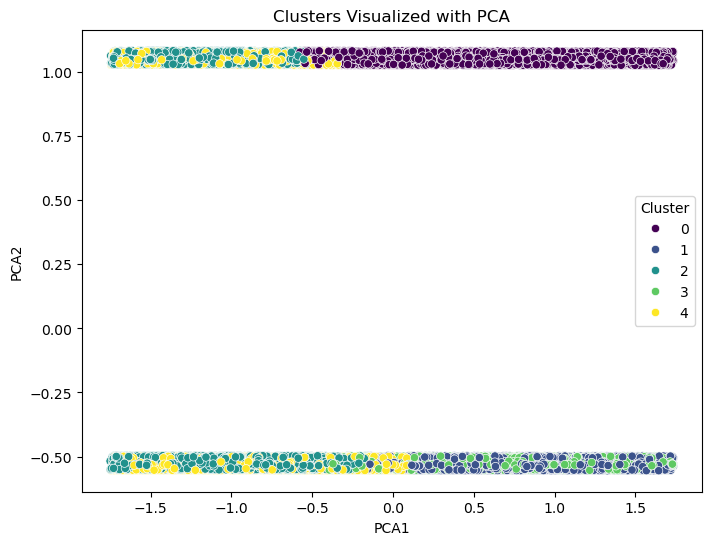

In [1464]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.show()